In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('../..')

In [3]:
from stable_baselines3.common.env_checker import check_env

from vimms_gym.env import DDAEnv
from vimms_gym.features import obs_to_dfs
from experiments import preset_qcb_small

# Sequential DDA environment test

In [4]:
alpha = 0.25
beta = 0.0
extract = False
params, max_peaks = preset_qcb_small(None, alpha=alpha, beta=beta, extract_chromatograms=extract)
params, max_peaks

2022-08-23 16:07:32.300 | INFO     | experiments:get_samplers:283 - Loaded /Users/joewandy/Work/git/vimms-gym/pickles/samplers_QCB_small_gaussian.p


({'chemical_creator': {'mz_range': (100, 110),
   'rt_range': (400, 500),
   'intensity_range': (10000.0, 1e+20),
   'n_chemicals': (20, 50),
   'mz_sampler': <vimms.ChemicalSamplers.MZMLFormulaSampler at 0x7f98ee1c7eb0>,
   'ri_sampler': <vimms.ChemicalSamplers.MZMLRTandIntensitySampler at 0x7f98ee1e7250>,
   'cr_sampler': <vimms.ChemicalSamplers.GaussianChromatogramSampler at 0x7f98ee1ecbb0>},
  'noise': {'enable_spike_noise': True,
   'noise_density': 0.1,
   'noise_max_val': 1000.0,
   'mz_range': (100, 110)},
  'env': {'ionisation_mode': 'Positive',
   'rt_range': (400, 500),
   'isolation_window': 0.7,
   'mz_tol': 10,
   'rt_tol': 120,
   'alpha': 0.25,
   'beta': 0.0}},
 100)

Initialise a new DDA environment that tracks the top most intense peaks.

In [5]:
env = DDAEnv(max_peaks, params)
check_env(env)

Generate an initial observation (MS1 scan)

In [6]:
observation = env.reset()
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

(    intensities  fragmented  excluded  roi_length  \
 0      0.091348         0.0       0.0         0.0   
 1      0.000000         0.0       0.0         0.0   
 2      0.000000         0.0       0.0         0.0   
 3      0.000000         0.0       0.0         0.0   
 4      0.000000         0.0       0.0         0.0   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0       0.0         0.0   
 96     0.000000         0.0       0.0         0.0   
 97     0.000000         0.0       0.0         0.0   
 98     0.000000         0.0       0.0         0.0   
 99     0.000000         0.0       0.0         0.0   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [7]:
observation['valid_actions']

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [8]:
env.features

[mz=101.86424049977249 rt=400 intensity=67.13793724323891 (0.09134839968917971) fragmented=False roi=ROI with data points=1 fragmentations=0 mz (101.8642-101.8642) rt (400.0000-400.0000)]

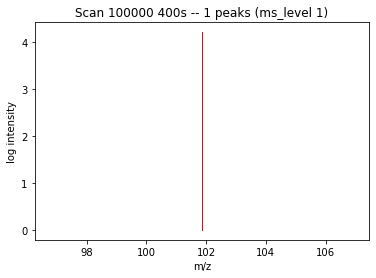

In [9]:
env.render()

Generate a lot of ms1 scans

In [10]:
for i in range(200):
    action = max_peaks  # ms1
    observation, reward, done, info = env.step(action)

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

reward 0.1
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.294110         0.0       0.0       0.256   
 1      0.215394         0.0       0.0       0.216   
 2      0.214887         0.0       0.0       0.336   
 3      0.209434         0.0       0.0       0.328   
 4      0.206622         0.0       0.0       0.216   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0       0.0       0.000   
 96     0.000000         0.0       0.0       0.000   
 97     0.000000         0.0       0.0       0.000   
 98     0.000000         0.0       0.0       0.000   
 99     0.000000         0.0       0.0       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [11]:
observation['valid_actions']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [12]:
env.features

[mz=104.14686158657658 rt=479.99999999999545 intensity=762415.6803608977 (0.29410959098593265) fragmented=False roi=ROI with data points=65 fragmentations=0 mz (104.1469-104.1469) rt (454.4000-480.0000),
 mz=104.34096421124318 rt=479.99999999999545 intensity=20317.743221491048 (0.21539377336739626) fragmented=False roi=ROI with data points=55 fragmentations=0 mz (104.3410-104.3410) rt (458.4000-480.0000),
 mz=104.53015234691213 rt=479.99999999999545 intensity=19849.495519727705 (0.21488747367641106) fragmented=False roi=ROI with data points=85 fragmentations=0 mz (104.5302-104.5302) rt (446.4000-480.0000),
 mz=104.2106739687823 rt=479.99999999999545 intensity=15441.414177158878 (0.20943435359924692) fragmented=False roi=ROI with data points=83 fragmentations=0 mz (104.2107-104.2107) rt (447.2000-480.0000),
 mz=104.01837556453597 rt=479.99999999999545 intensity=13565.910144536067 (0.2066224468067974) fragmented=False roi=ROI with data points=55 fragmentations=0 mz (104.0184-104.0184) rt

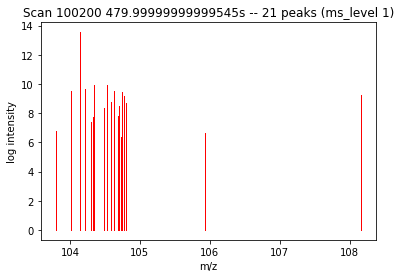

In [13]:
env.render()

Target the most intense precursor for fragmentation, and generate an MS2 scan from that

In [14]:
action = 0
observation, reward, done, info = env.step(action)

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

reward 0.34769362173139484
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.294110         1.0  0.003333       0.256   
 1      0.215394         0.0  0.000000       0.216   
 2      0.214887         0.0  0.000000       0.336   
 3      0.209434         0.0  0.000000       0.328   
 4      0.206622         0.0  0.000000       0.216   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0  0.000000       0.000   
 96     0.000000         0.0  0.000000       0.000   
 97     0.000000         0.0  0.000000       0.000   
 98     0.000000         0.0  0.000000       0.000   
 99     0.000000         0.0  0.000000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [15]:
observation['valid_actions']

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [16]:
env.features

[mz=104.14686158657658 rt=479.99999999999545 intensity=762415.6803608977 (0.29410959098593265) fragmented=True roi=ROI with data points=65 fragmentations=0 mz (104.1469-104.1469) rt (454.4000-480.0000),
 mz=104.34096421124318 rt=479.99999999999545 intensity=20317.743221491048 (0.21539377336739626) fragmented=False roi=ROI with data points=55 fragmentations=0 mz (104.3410-104.3410) rt (458.4000-480.0000),
 mz=104.53015234691213 rt=479.99999999999545 intensity=19849.495519727705 (0.21488747367641106) fragmented=False roi=ROI with data points=85 fragmentations=0 mz (104.5302-104.5302) rt (446.4000-480.0000),
 mz=104.2106739687823 rt=479.99999999999545 intensity=15441.414177158878 (0.20943435359924692) fragmented=False roi=ROI with data points=83 fragmentations=0 mz (104.2107-104.2107) rt (447.2000-480.0000),
 mz=104.01837556453597 rt=479.99999999999545 intensity=13565.910144536067 (0.2066224468067974) fragmented=False roi=ROI with data points=55 fragmentations=0 mz (104.0184-104.0184) rt 

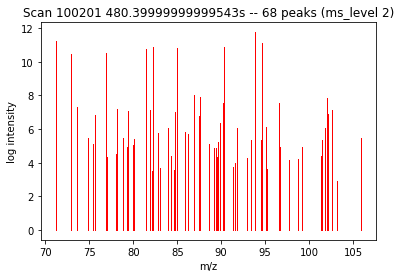

In [17]:
env.render()

Target the next most intense precursor for fragmentation, and generate an MS2 scan

In [18]:
action = 1
observation, reward, done, info = env.step(action)

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

reward 0.10169893507066936
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.294110         1.0     0.005       0.256   
 1      0.215394         1.0     0.005       0.216   
 2      0.214887         0.0     0.000       0.336   
 3      0.209434         0.0     0.000       0.328   
 4      0.206622         0.0     0.000       0.216   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0     0.000       0.000   
 96     0.000000         0.0     0.000       0.000   
 97     0.000000         0.0     0.000       0.000   
 98     0.000000         0.0     0.000       0.000   
 99     0.000000         0.0     0.000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [19]:
observation['valid_actions']

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [20]:
env.features

[mz=104.14686158657658 rt=479.99999999999545 intensity=762415.6803608977 (0.29410959098593265) fragmented=True roi=ROI with data points=65 fragmentations=0 mz (104.1469-104.1469) rt (454.4000-480.0000),
 mz=104.34096421124318 rt=479.99999999999545 intensity=20317.743221491048 (0.21539377336739626) fragmented=True roi=ROI with data points=55 fragmentations=0 mz (104.3410-104.3410) rt (458.4000-480.0000),
 mz=104.53015234691213 rt=479.99999999999545 intensity=19849.495519727705 (0.21488747367641106) fragmented=False roi=ROI with data points=85 fragmentations=0 mz (104.5302-104.5302) rt (446.4000-480.0000),
 mz=104.2106739687823 rt=479.99999999999545 intensity=15441.414177158878 (0.20943435359924692) fragmented=False roi=ROI with data points=83 fragmentations=0 mz (104.2107-104.2107) rt (447.2000-480.0000),
 mz=104.01837556453597 rt=479.99999999999545 intensity=13565.910144536067 (0.2066224468067974) fragmented=False roi=ROI with data points=55 fragmentations=0 mz (104.0184-104.0184) rt (

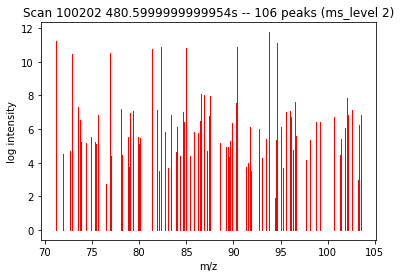

In [21]:
env.render()

Repeat targeting of the same precursor will end up targeting low-intensity spike noises (non-chemicals), which produce no reward

In [22]:
for i in range(10):
    action = 0
    observation, reward, done, info = env.step(action)
    print('reward', reward)
    # print('done', done)
    # pp.pprint(observation)
    # env.render()

reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0


In [23]:
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

(    intensities  fragmented  excluded  roi_length  \
 0      0.294110         1.0  0.021667       0.256   
 1      0.215394         1.0  0.021667       0.216   
 2      0.214887         0.0  0.000000       0.336   
 3      0.209434         0.0  0.000000       0.328   
 4      0.206622         0.0  0.000000       0.216   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0  0.000000       0.000   
 96     0.000000         0.0  0.000000       0.000   
 97     0.000000         0.0  0.000000       0.000   
 98     0.000000         0.0  0.000000       0.000   
 99     0.000000         0.0  0.000000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [24]:
observation['valid_actions']

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [25]:
env.features

[mz=104.14686158657658 rt=479.99999999999545 intensity=762415.6803608977 (0.29410959098593265) fragmented=True roi=ROI with data points=65 fragmentations=0 mz (104.1469-104.1469) rt (454.4000-480.0000),
 mz=104.34096421124318 rt=479.99999999999545 intensity=20317.743221491048 (0.21539377336739626) fragmented=True roi=ROI with data points=55 fragmentations=0 mz (104.3410-104.3410) rt (458.4000-480.0000),
 mz=104.53015234691213 rt=479.99999999999545 intensity=19849.495519727705 (0.21488747367641106) fragmented=False roi=ROI with data points=85 fragmentations=0 mz (104.5302-104.5302) rt (446.4000-480.0000),
 mz=104.2106739687823 rt=479.99999999999545 intensity=15441.414177158878 (0.20943435359924692) fragmented=False roi=ROI with data points=83 fragmentations=0 mz (104.2107-104.2107) rt (447.2000-480.0000),
 mz=104.01837556453597 rt=479.99999999999545 intensity=13565.910144536067 (0.2066224468067974) fragmented=False roi=ROI with data points=55 fragmentations=0 mz (104.0184-104.0184) rt (

Making an invalid move produces negative reward.

In [26]:
action = 50  # no precursor to fragment at this index
observation, reward, done, info = env.step(action)

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

reward -1.0
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.294110         1.0  0.023333       0.256   
 1      0.215394         1.0  0.023333       0.216   
 2      0.214887         0.0  0.000000       0.336   
 3      0.209434         0.0  0.000000       0.328   
 4      0.206622         0.0  0.000000       0.216   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0  0.000000       0.000   
 96     0.000000         0.0  0.000000       0.000   
 97     0.000000         0.0  0.000000       0.000   
 98     0.000000         0.0  0.000000       0.000   
 99     0.000000         0.0  0.000000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [27]:
observation['valid_actions']

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [28]:
env.features

[mz=104.14686158657658 rt=479.99999999999545 intensity=762415.6803608977 (0.29410959098593265) fragmented=True roi=ROI with data points=65 fragmentations=0 mz (104.1469-104.1469) rt (454.4000-480.0000),
 mz=104.34096421124318 rt=479.99999999999545 intensity=20317.743221491048 (0.21539377336739626) fragmented=True roi=ROI with data points=55 fragmentations=0 mz (104.3410-104.3410) rt (458.4000-480.0000),
 mz=104.53015234691213 rt=479.99999999999545 intensity=19849.495519727705 (0.21488747367641106) fragmented=False roi=ROI with data points=85 fragmentations=0 mz (104.5302-104.5302) rt (446.4000-480.0000),
 mz=104.2106739687823 rt=479.99999999999545 intensity=15441.414177158878 (0.20943435359924692) fragmented=False roi=ROI with data points=83 fragmentations=0 mz (104.2107-104.2107) rt (447.2000-480.0000),
 mz=104.01837556453597 rt=479.99999999999545 intensity=13565.910144536067 (0.2066224468067974) fragmented=False roi=ROI with data points=55 fragmentations=0 mz (104.0184-104.0184) rt (

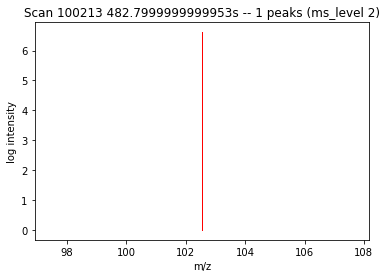

In [29]:
env.render()

Generate lots of MS1 scans

In [30]:
for i in range(10):
    action = max_peaks  # ms1
    observation, reward, done, info = env.step(action)
    print(reward, done, info)
    if done:
        break

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

0.1 False {'current_scan_id': 100213}
0.1 False {'current_scan_id': 100214}
0.1 False {'current_scan_id': 100215}
0.1 False {'current_scan_id': 100216}
0.1 False {'current_scan_id': 100217}
0.1 False {'current_scan_id': 100218}
0.1 False {'current_scan_id': 100219}
0.1 False {'current_scan_id': 100220}
0.1 False {'current_scan_id': 100221}
0.1 False {'current_scan_id': 100222}
reward 0.1
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.289315         0.0     0.055       0.322   
 1      0.216390         0.0     0.055       0.282   
 2      0.213307         0.0     0.000       0.242   
 3      0.209956         0.0     0.000       0.086   
 4      0.207780         0.0     0.000       0.282   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0     0.000       0.000   
 96     0.000000         0.0     0.000       0.000   
 97     0.000000         0.0     0.000       0.000   
 98     0.000000         0.0     0.000       0.000   
 99     0.000000         0.0     0.000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                           0.018871                    0.294110   
 1                           0.018871                    0.215394   
 2                           0.000000                    0.000000   
 3                           0.000000                    0.000000   
 4   

In [31]:
observation['valid_actions']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [32]:
env.features

[mz=104.14686158657658 rt=486.5999999999951 intensity=611376.3372687678 (0.2893154312883233) fragmented=False roi=ROI with data points=75 fragmentations=0 mz (104.1469-104.1469) rt (454.4000-486.6000),
 mz=104.34096421124318 rt=486.5999999999951 intensity=21271.943358892335 (0.21639035839614623) fragmented=False roi=ROI with data points=65 fragmentations=0 mz (104.3410-104.3410) rt (458.4000-486.6000),
 mz=104.62750174459367 rt=486.5999999999951 intensity=18456.274829000846 (0.21330720242803014) fragmented=False roi=ROI with data points=55 fragmentations=0 mz (104.6275-104.6275) rt (462.4000-486.6000),
 mz=104.4801775092565 rt=486.5999999999951 intensity=15816.689000967375 (0.20995577876495392) fragmented=False roi=ROI with data points=16 fragmentations=0 mz (104.4802-104.4802) rt (478.0000-486.6000),
 mz=104.01837556453597 rt=486.5999999999951 intensity=14308.768984907158 (0.20778011360252865) fragmented=False roi=ROI with data points=65 fragmentations=0 mz (104.0184-104.0184) rt (458

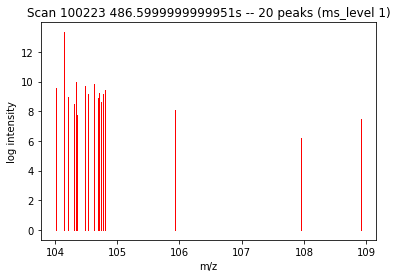

In [33]:
env.render()

Not doing any fragmentation (performing only MS1 scans) will receive a huge negative reward in the end.

In [34]:
env.reset()
for i in range(1000):
    action = max_peaks  # ms1
    observation, reward, done, info = env.step(action)
    print(reward, done, info)
    if done:
        break

print('reward', reward)
print('done', done)

0.1 False {'current_scan_id': 100000}
0.1 False {'current_scan_id': 100001}
0.1 False {'current_scan_id': 100002}
0.1 False {'current_scan_id': 100003}
0.1 False {'current_scan_id': 100004}
0.1 False {'current_scan_id': 100005}
0.1 False {'current_scan_id': 100006}
0.1 False {'current_scan_id': 100007}
0.1 False {'current_scan_id': 100008}
0.1 False {'current_scan_id': 100009}
0.1 False {'current_scan_id': 100010}
0.1 False {'current_scan_id': 100011}
0.1 False {'current_scan_id': 100012}
0.1 False {'current_scan_id': 100013}
0.1 False {'current_scan_id': 100014}
0.1 False {'current_scan_id': 100015}
0.1 False {'current_scan_id': 100016}
0.1 False {'current_scan_id': 100017}
0.1 False {'current_scan_id': 100018}
0.1 False {'current_scan_id': 100019}
0.1 False {'current_scan_id': 100020}
0.1 False {'current_scan_id': 100021}
0.1 False {'current_scan_id': 100022}
0.1 False {'current_scan_id': 100023}
0.1 False {'current_scan_id': 100024}
0.1 False {'current_scan_id': 100025}
0.1 False {'